In [66]:
import os
import sys
import tensorflow as tf
from tensorflow import keras
import pandas as pd
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, roc_auc_score
import warnings
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import random
import numpy as np
from IPython.display import clear_output

%load_ext autoreload
%autoreload 2
# Get the absolute path to the root of your project.
project_root = os.path.abspath(os.path.join(os.getcwd(), os.pardir, os.pardir))

# Add this path to the sys.path.
sys.path.insert(0, project_root)

# Now you can import the MLP class from the NeuralNetwork module.
from src.NeuralNetwork import MLP
from src.Value import Value


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [67]:
SEED = 42
random.seed(SEED)

In [68]:
warnings.filterwarnings("ignore")
pd.set_option("display.max_rows", 500)
pd.set_option("display.max_columns", 500)

# Load data
wine_df = pd.read_csv("../../data/wine.csv")
wine_df = wine_df.sample(frac=0.1, random_state=SEED)
# Split data into training and test
target_column_name = "Class"
X_train, X_test, y_train, y_test = train_test_split(
    wine_df.drop(columns=target_column_name),
    wine_df[target_column_name],
    test_size=0.30,
    random_state=SEED,
)
# Normalize data
znormalizer = StandardScaler()
znormalizer.fit(X_train)
X_train_norm = pd.DataFrame(znormalizer.transform(X_train), columns=X_train.columns)
X_test_norm = pd.DataFrame(znormalizer.transform(X_test), columns=X_test.columns)

In [77]:
# Define a Model

number_of_inputs = X_test_norm.shape[1]

number_of_outputs_for_each_layer = [32, 32, 1]

mlp = MLP(X_test_norm.shape[1], number_of_outputs_for_each_layer)
losses = []
total_number_of_epochs = 0

In [78]:
number_of_epochs = 10

for epoch in range(number_of_epochs + 1):
    clear_output(wait=True)
    print(f"Training: {(epoch / number_of_epochs) * 100}%")
    # Forward pass
    actual_ys = [mlp(x)[0] for x in X_train_norm.values]
    loss: Value = sum((expected_y - actual_y)**2 for expected_y,
                      actual_y in zip(y_train.values, actual_ys))
    # Collect all losses
    losses.append(loss.data)
    total_number_of_epochs +=1
    # zero grad
    for p in mlp.parameters():
        p.grad = 0.0
    # Backward pass
    loss.backward()

    for p in mlp.parameters():
        p.data += -0.001 * p.grad
        

Training: 100.0%


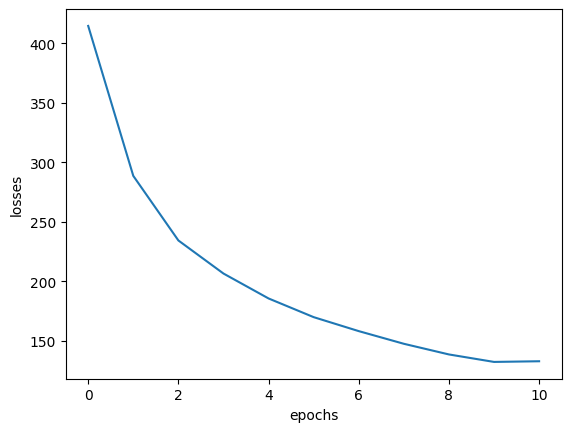

In [79]:
plt.plot(range(total_number_of_epochs), losses)
plt.xlabel('epochs')
plt.ylabel('losses')
plt.show()

In [89]:
x = X_test.values[7]
mlp(x)[0]

Value(data=-0.24112771079963474)

In [90]:
for x, y in zip(X_test.values, y_test):
  print(f"pred: {mlp(x)[0]}, actual: {y}")

pred: Value(data=-0.14450645286874075), actual: 1
pred: Value(data=-0.23555957924602267), actual: 1
pred: Value(data=-0.2175179933575824), actual: 1
pred: Value(data=0.11291094889827352), actual: 1
pred: Value(data=-0.996491526801289), actual: 0
pred: Value(data=-0.9334709191950449), actual: 0
pred: Value(data=-0.9297094505419385), actual: 0
pred: Value(data=-0.24112771079963474), actual: 1
pred: Value(data=-0.9830302522887681), actual: 0
pred: Value(data=-0.9964915267177819), actual: 0
pred: Value(data=-0.9824584175681234), actual: 1
pred: Value(data=-0.983931198016069), actual: 0
pred: Value(data=-0.9818186644638615), actual: 0
pred: Value(data=-0.9297067110207001), actual: 0
pred: Value(data=0.01936785792047659), actual: 1
pred: Value(data=-0.9830756127584303), actual: 0
pred: Value(data=-0.9297068113337756), actual: 0
pred: Value(data=-0.9934238466739171), actual: 0
pred: Value(data=-0.9830737205681522), actual: 0
pred: Value(data=-0.8789980667687057), actual: 0
pred: Value(data=-0

In [91]:
prediction = [mlp(x)[0] for x in X_test.values]

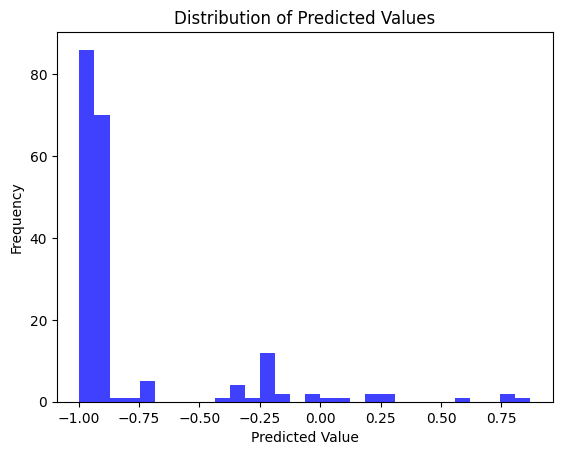

In [93]:
# Extracting the float values from the Value objects
predicted_values = [x.data if isinstance(x, Value) else x for x in prediction]

# Create a histogram of the predicted values
plt.hist(predicted_values, bins=30, alpha=0.75, color='blue')

# Add a title and labels
plt.title('Distribution of Predicted Values')
plt.xlabel('Predicted Value')
plt.ylabel('Frequency')

# Show the plot
plt.show()


In [97]:
y_test.shape

(195,)

In [116]:
def to_bin(pred, threshold):
  return [1 if x > threshold else 0 for x in pred]
    
number_of_valid = 0 
for py, y in zip(to_bin(predicted_values, -0.5), y_test):
  if py == y:
    number_of_valid +=1

accuracy = number_of_valid / y_test.shape[0]
accuracy

0.8974358974358975

In [115]:
[(x, y) for x, y in zip(y_test, predicted_values)]

[(1, -0.14450645286874075),
 (1, -0.23555957924602267),
 (1, -0.2175179933575824),
 (1, 0.11291094889827352),
 (0, -0.996491526801289),
 (0, -0.9334709191950449),
 (0, -0.9297094505419385),
 (1, -0.24112771079963474),
 (0, -0.9830302522887681),
 (0, -0.9964915267177819),
 (1, -0.9824584175681234),
 (0, -0.983931198016069),
 (0, -0.9818186644638615),
 (0, -0.9297067110207001),
 (1, 0.01936785792047659),
 (0, -0.9830756127584303),
 (0, -0.9297068113337756),
 (0, -0.9934238466739171),
 (0, -0.9830737205681522),
 (0, -0.8789980667687057),
 (0, -0.9830472727813218),
 (0, -0.9829794762054546),
 (0, -0.9830580382011957),
 (0, -0.9957406586400721),
 (1, 0.24566774081178272),
 (0, -0.9964606224390945),
 (1, -0.9307536099089964),
 (0, -0.9297068412857723),
 (0, -0.929706894098471),
 (0, -0.9297067106308129),
 (0, -0.7943266871245073),
 (0, -0.9297218926575039),
 (0, -0.9161001530343512),
 (0, -0.9300468331895598),
 (1, -0.9292530733481079),
 (0, -0.9297067123868638),
 (0, -0.9830738175139452),
 

In [73]:
# Test a Model
def test(mlp: MLP, testing_data_points, testing_targets):
    """Test if model guess iris specie correctly
    """
    results = [mlp(x)[0] for x in testing_data_points.values]
    
    actual = [0.0 if abs(result.data) < 0.33 else 0.5 if abs(result.data) < 0.66 else 1.0 for result in results]
    
    accuracy = (sum([1 if actual[i] == testing_targets[i] else 0 for i in range(len(testing_targets)) ]) / len(testing_targets)) * 100 

    for i, result in enumerate(results):
        print(f"#{i} | Target: {testing_targets[i]} | Actual: {actual[i]}")
    print(f"Total accuracy: {accuracy}")
        
test(mlp, X_test_norm, y_test)

KeyError: 0